# Regresión Logística

### Función Sigmoide

![Logo](./sigmoid.png)

In [38]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def sigmoid(datlinreg):
    return 1/(1+np.exp(-datlinreg))

![log es](./loges1.png)

In [53]:
def log_likelihood(datos, target, weights):
    scores = np.dot(datos, weights)
    ll = np.sum(target*np.log(sigmoid(scores)) - (1 - target)*np.log(1 - sigmoid(scores)))
    return ll

In [40]:
def loadDataSet():
    
    dataMat = []
    etiMat = []
    archivo = open('testSet.txt')
    
    for line in archivo.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        etiMat.append(int(lineArr[2]))
        
    return dataMat,etiMat


## Gradiente de Ascenso

![Logo](./gdrl.png)

In [67]:
def grad_ascenso(data_mat, clases_etiquetas):
    
    data_matrix = np.mat(data_mat)            
    eti_mat = np.mat(clases_etiquetas).transpose() 
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    iteraciones = 5000
    weights = np.ones((n,1))
    
    for k in range(iteraciones):             
        
        h = sigmoid(data_matrix*weights)     
        error = (eti_Mat - h)              
        weights = weights + alpha * data_matrix.transpose()* error 
        
        if k % 1000 == 0:
            print(log_likelihood(np.array(data_matrix), np.array(eti_mat).T , weights))
    
    return weights

In [68]:
def prediccion(weights, dato):
    return sigmoid(np.dot(weights,datos))

In [69]:

def graficar_borde(weights):
    dataMat,etiMat=loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    
    xcord1 = [] 
    ycord1 = []
    xcord2 = [] 
    ycord2 = []
    
    for i in range(n):
        if int(etiMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y.T)
    plt.xlabel('X1') 
    plt.ylabel('X2')
    plt.show()

274.0960208557577
-3.493409539711771
-2.286667059075337
-1.807445202318946
-1.5428399941441322


<IPython.core.display.Javascript object>


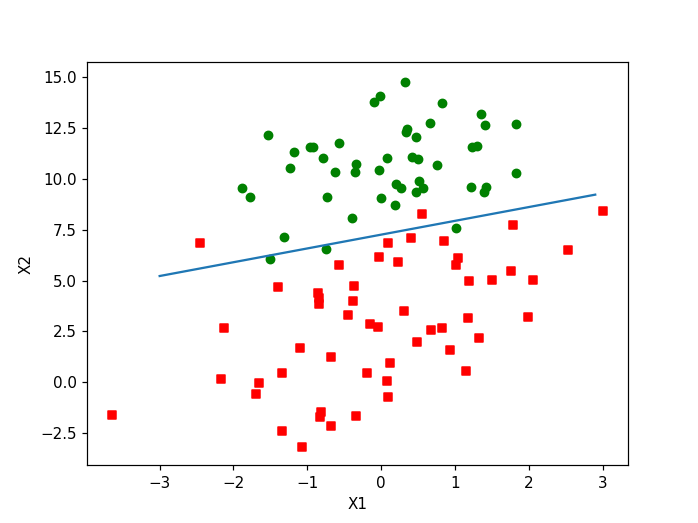

In [70]:
datos, etiquetas = loadDataSet()
pesos = gradAscent(datos , etiquetas)
graficar_borde(pesos)